# Data Cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import MobileNetV2, VGG16, InceptionV3, Xception

In [3]:
test_ear = plt.imread('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/effusion_test/AM156L.jpg')

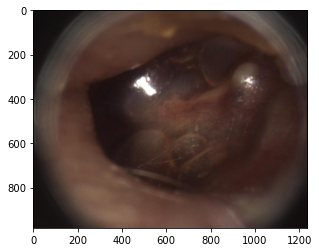

In [4]:
plt.imshow(test_ear);

In [82]:
train_gen = ImageDataGenerator(rescale = 1/255., validation_split=0.2)

In [83]:
train_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'training' )

Found 251 images belonging to 3 classes.


In [84]:
validation_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', batch_size = 32, subset = 'validation' )

Found 61 images belonging to 3 classes.


## Basic Model

In [57]:
model = Sequential()
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [58]:
history = model.fit(train_data, epochs = 20, validation_data = validation_data,
    batch_size = 32)

Epoch 1/20
8/8 [==============================] - 5s 588ms/step - loss: 58.3907 - accuracy: 0.3865 - val_loss: 30.9875 - val_accuracy: 0.3934
Epoch 2/20
8/8 [==============================] - 4s 441ms/step - loss: 25.2814 - accuracy: 0.4024 - val_loss: 13.1248 - val_accuracy: 0.4098
Epoch 3/20
8/8 [==============================] - 4s 467ms/step - loss: 16.6978 - accuracy: 0.4343 - val_loss: 5.0853 - val_accuracy: 0.6557
Epoch 4/20
8/8 [==============================] - 4s 452ms/step - loss: 9.2058 - accuracy: 0.6255 - val_loss: 18.0258 - val_accuracy: 0.3115
Epoch 5/20
8/8 [==============================] - 3s 435ms/step - loss: 11.3506 - accuracy: 0.5697 - val_loss: 4.4627 - val_accuracy: 0.7377
Epoch 6/20
8/8 [==============================] - 4s 451ms/step - loss: 6.8882 - accuracy: 0.6255 - val_loss: 5.4603 - val_accuracy: 0.6393
Epoch 7/20
8/8 [==============================] - 3s 439ms/step - loss: 5.4241 - accuracy: 0.6813 - val_loss: 2.3282 - val_accuracy: 0.8197
Epoch 8/20
8/

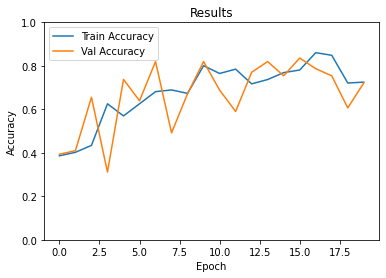

In [60]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

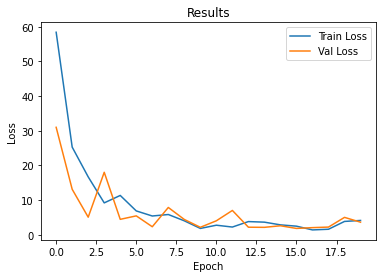

In [62]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 1: Adding Epochs

In [67]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(100, activation = 'relu'))
model1.add(Dense(3, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [68]:
history1 = model1.fit(train_data, epochs = 100, validation_data = validation_data,
    batch_size = 32)

Epoch 1/100
8/8 [==============================] - 5s 576ms/step - loss: 100.9300 - accuracy: 0.3108 - val_loss: 51.8302 - val_accuracy: 0.3934
Epoch 2/100
8/8 [==============================] - 4s 467ms/step - loss: 46.5447 - accuracy: 0.3386 - val_loss: 26.1313 - val_accuracy: 0.3934
Epoch 3/100
8/8 [==============================] - 4s 453ms/step - loss: 30.0947 - accuracy: 0.4183 - val_loss: 25.5399 - val_accuracy: 0.3934
Epoch 4/100
8/8 [==============================] - 3s 432ms/step - loss: 21.5806 - accuracy: 0.5219 - val_loss: 6.2143 - val_accuracy: 0.6393
Epoch 5/100
8/8 [==============================] - 4s 445ms/step - loss: 10.6387 - accuracy: 0.6056 - val_loss: 8.7971 - val_accuracy: 0.4590
Epoch 6/100
8/8 [==============================] - 3s 442ms/step - loss: 6.0536 - accuracy: 0.6534 - val_loss: 4.0189 - val_accuracy: 0.7049
Epoch 7/100
8/8 [==============================] - 4s 457ms/step - loss: 4.7343 - accuracy: 0.6853 - val_loss: 5.2432 - val_accuracy: 0.5738
Epoc

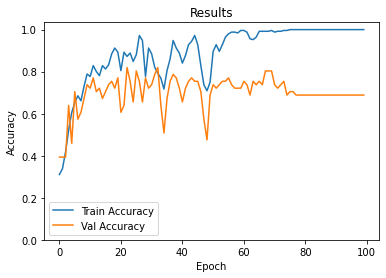

In [69]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

overfit try less epochs

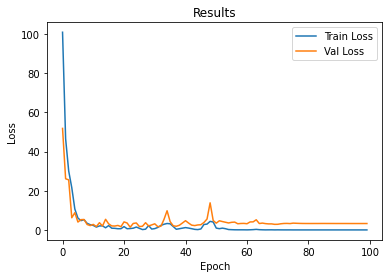

In [70]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history1.history['loss'], label = 'Train Loss')
plt.plot(history1.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 2: Adding Layers 

In [72]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(3, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [73]:
history2 = model2.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 5s 562ms/step - loss: 37.6008 - accuracy: 0.3984 - val_loss: 7.2048 - val_accuracy: 0.3934
Epoch 2/80
8/8 [==============================] - 4s 448ms/step - loss: 14.5180 - accuracy: 0.3586 - val_loss: 14.0751 - val_accuracy: 0.3934
Epoch 3/80
8/8 [==============================] - 3s 439ms/step - loss: 11.0005 - accuracy: 0.3825 - val_loss: 9.5466 - val_accuracy: 0.3934
Epoch 4/80
8/8 [==============================] - 3s 446ms/step - loss: 6.7617 - accuracy: 0.4980 - val_loss: 5.5885 - val_accuracy: 0.5082
Epoch 5/80
8/8 [==============================] - 4s 451ms/step - loss: 5.3937 - accuracy: 0.3745 - val_loss: 7.2143 - val_accuracy: 0.2131
Epoch 6/80
8/8 [==============================] - 3s 427ms/step - loss: 4.6539 - accuracy: 0.3944 - val_loss: 2.9676 - val_accuracy: 0.3934
Epoch 7/80
8/8 [==============================] - 4s 465ms/step - loss: 2.3077 - accuracy: 0.4382 - val_loss: 1.4243 - val_accuracy: 0.3934
Epoch 8/80
8/8 [

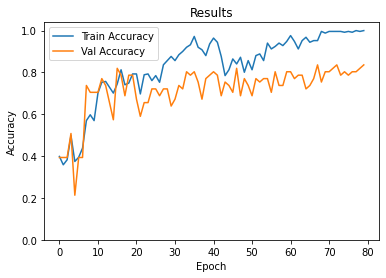

In [75]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

still overfit but less than model 1, will try early stopping

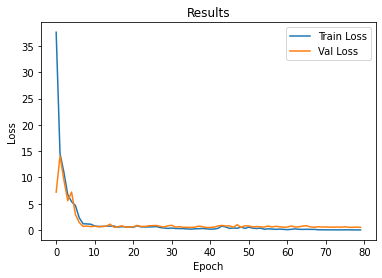

In [76]:
plt.plot(history2.history['loss'], label = 'Train Loss')
plt.plot(history2.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 3: Changing Layers and Using Early Stopping 

In [46]:
early_stop = EarlyStopping(patience = 5)

In [95]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(100, activation = 'relu'))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(3, activation = 'softmax'))

model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [96]:
history3 = model3.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32, callbacks=[early_stop])

Epoch 1/80
8/8 [==============================] - 5s 641ms/step - loss: 51.6483 - accuracy: 0.4104 - val_loss: 10.7261 - val_accuracy: 0.3607
Epoch 2/80
8/8 [==============================] - 3s 424ms/step - loss: 16.4546 - accuracy: 0.4024 - val_loss: 6.9172 - val_accuracy: 0.5574
Epoch 3/80
8/8 [==============================] - 3s 436ms/step - loss: 10.3646 - accuracy: 0.5498 - val_loss: 2.9979 - val_accuracy: 0.6557
Epoch 4/80
8/8 [==============================] - 3s 417ms/step - loss: 8.2659 - accuracy: 0.5498 - val_loss: 4.5782 - val_accuracy: 0.5738
Epoch 5/80
8/8 [==============================] - 3s 418ms/step - loss: 6.9112 - accuracy: 0.5896 - val_loss: 1.6602 - val_accuracy: 0.7869
Epoch 6/80
8/8 [==============================] - 3s 434ms/step - loss: 2.9608 - accuracy: 0.7331 - val_loss: 3.1414 - val_accuracy: 0.6557
Epoch 7/80
8/8 [==============================] - 3s 407ms/step - loss: 5.7655 - accuracy: 0.5657 - val_loss: 2.5480 - val_accuracy: 0.6721
Epoch 8/80
8/8 [

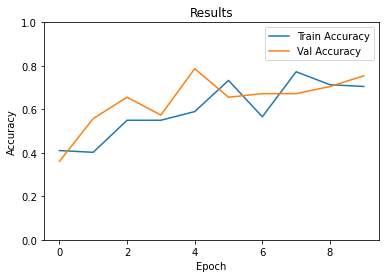

In [97]:
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

Model Improving, not as overfit will look at dropout now 

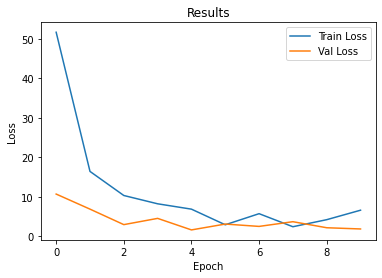

In [99]:
plt.plot(history3.history['loss'], label = 'Train Loss')
plt.plot(history3.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 4: Changing Layers and Dropout

In [129]:
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(100, activation = 'relu'))
model4.add(Dropout(0.1))
model4.add(Dense(50, activation = 'relu'))
model4.add(Dense(3, activation = 'softmax'))

model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [175]:
history4 = model4.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 5s 508ms/step - loss: 1.1337 - accuracy: 0.7331 - val_loss: 1.3836 - val_accuracy: 0.5902
Epoch 2/80
8/8 [==============================] - 4s 451ms/step - loss: 1.4510 - accuracy: 0.6693 - val_loss: 1.0094 - val_accuracy: 0.6557
Epoch 3/80
8/8 [==============================] - 4s 453ms/step - loss: 1.3653 - accuracy: 0.6574 - val_loss: 0.7476 - val_accuracy: 0.7049
Epoch 4/80
8/8 [==============================] - 3s 424ms/step - loss: 1.4843 - accuracy: 0.6773 - val_loss: 0.8469 - val_accuracy: 0.7213
Epoch 5/80
8/8 [==============================] - 4s 447ms/step - loss: 1.0048 - accuracy: 0.7251 - val_loss: 0.6717 - val_accuracy: 0.6885
Epoch 6/80
8/8 [==============================] - 3s 449ms/step - loss: 0.8526 - accuracy: 0.7610 - val_loss: 0.7986 - val_accuracy: 0.7213
Epoch 7/80
8/8 [==============================] - 3s 426ms/step - loss: 1.0752 - accuracy: 0.6653 - val_loss: 0.7408 - val_accuracy: 0.7377
Epoch 8/80
8/8 [====

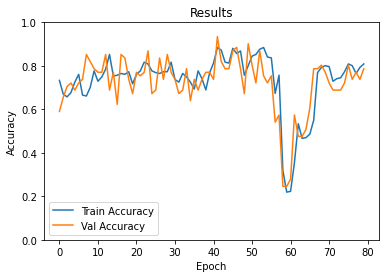

In [176]:
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

trend following closely with train and validation data

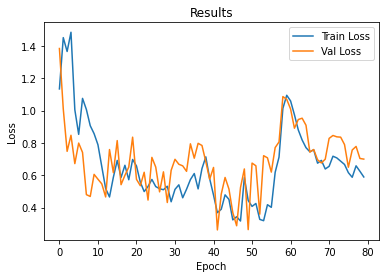

In [177]:
plt.plot(history4.history['loss'], label = 'Train Loss')
plt.plot(history4.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 5: Kernal Regularizer with Dropout

In [185]:
model5 = Sequential()
model5.add(Flatten())
model5.add(Dense(100, activation = 'relu'))
model5.add(Dropout(0.1))
model5.add(Dense(50, activation = 'relu', kernel_regularizer = l2(0.1)))
model5.add(Dense(3, activation = 'softmax'))

model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [186]:
history5 = model5.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 4s 522ms/step - loss: 51.4717 - accuracy: 0.3307 - val_loss: 45.1111 - val_accuracy: 0.3934
Epoch 2/80
8/8 [==============================] - 3s 419ms/step - loss: 43.2927 - accuracy: 0.3506 - val_loss: 5.3995 - val_accuracy: 0.4098
Epoch 3/80
8/8 [==============================] - 3s 436ms/step - loss: 18.2692 - accuracy: 0.4861 - val_loss: 14.9252 - val_accuracy: 0.4098
Epoch 4/80
8/8 [==============================] - 3s 413ms/step - loss: 16.5860 - accuracy: 0.4263 - val_loss: 3.6764 - val_accuracy: 0.5246
Epoch 5/80
8/8 [==============================] - 3s 414ms/step - loss: 11.5868 - accuracy: 0.5020 - val_loss: 5.2267 - val_accuracy: 0.4918
Epoch 6/80
8/8 [==============================] - 3s 434ms/step - loss: 8.3042 - accuracy: 0.5936 - val_loss: 1.2731 - val_accuracy: 0.8197
Epoch 7/80
8/8 [==============================] - 3s 433ms/step - loss: 4.3397 - accuracy: 0.6056 - val_loss: 1.2397 - val_accuracy: 0.7869
Epoch 8/80
8/

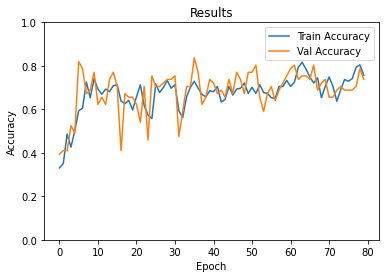

In [187]:
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

not much improvement with kernal regularizer 

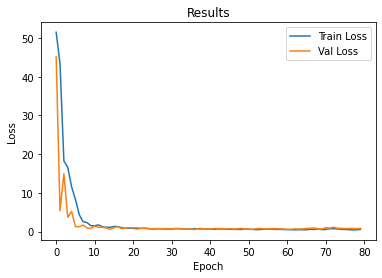

In [188]:
plt.plot(history5.history['loss'], label = 'Train Loss')
plt.plot(history5.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 6: Adding Convolutional Operation

In [207]:
model6 = Sequential()
model6.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model6.add(Flatten())
model6.add(Dense(100, activation = 'relu'))
model6.add(Dropout(0.1))
model6.add(Dense(50, activation = 'relu'))
model6.add(Dense(3, activation = 'softmax'))

model6.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [208]:
history6 = model6.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32,callbacks=[early_stop] )

Epoch 1/80
8/8 [==============================] - 8s 803ms/step - loss: 55.3464 - accuracy: 0.3625 - val_loss: 24.4076 - val_accuracy: 0.3934
Epoch 2/80
8/8 [==============================] - 6s 713ms/step - loss: 21.2681 - accuracy: 0.4343 - val_loss: 6.1987 - val_accuracy: 0.3279
Epoch 3/80
8/8 [==============================] - 6s 755ms/step - loss: 14.1390 - accuracy: 0.4741 - val_loss: 1.7330 - val_accuracy: 0.5574
Epoch 4/80
8/8 [==============================] - 6s 805ms/step - loss: 7.4806 - accuracy: 0.4781 - val_loss: 1.2511 - val_accuracy: 0.6557
Epoch 5/80
8/8 [==============================] - 6s 793ms/step - loss: 4.9704 - accuracy: 0.5299 - val_loss: 2.0598 - val_accuracy: 0.3279
Epoch 6/80
8/8 [==============================] - 6s 667ms/step - loss: 2.2624 - accuracy: 0.6135 - val_loss: 0.6421 - val_accuracy: 0.7377
Epoch 7/80
8/8 [==============================] - 6s 684ms/step - loss: 1.7816 - accuracy: 0.6494 - val_loss: 1.0923 - val_accuracy: 0.7213
Epoch 8/80
8/8 [

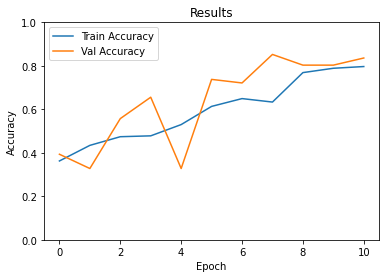

In [209]:
plt.plot(history6.history['accuracy'], label='Train Accuracy')
plt.plot(history6.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

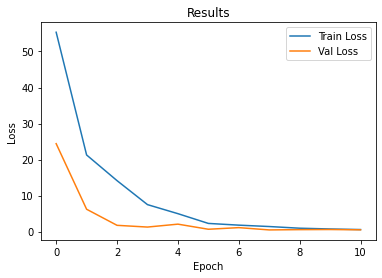

In [210]:
plt.plot(history6.history['loss'], label = 'Train Loss')
plt.plot(history6.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 7: Convolutional Operation and Max Pooling

In [85]:
model7 = Sequential()
model7.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model7.add(MaxPool2D((2, 2)))
model7.add(Flatten())
model7.add(Dense(100, activation = 'relu'))
model7.add(Dropout(0.1))
model7.add(Dense(50, activation = 'relu'))
model7.add(Dense(3, activation = 'softmax'))

model7.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [86]:
history7 = model7.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32,callbacks=[early_stop] )

Epoch 1/80
8/8 [==============================] - 6s 645ms/step - loss: 12.9201 - accuracy: 0.4104 - val_loss: 4.0931 - val_accuracy: 0.3934
Epoch 2/80
8/8 [==============================] - 4s 539ms/step - loss: 4.6580 - accuracy: 0.3386 - val_loss: 1.3280 - val_accuracy: 0.4098
Epoch 3/80
8/8 [==============================] - 5s 584ms/step - loss: 2.5599 - accuracy: 0.3825 - val_loss: 1.2917 - val_accuracy: 0.4590
Epoch 4/80
8/8 [==============================] - 5s 576ms/step - loss: 2.2041 - accuracy: 0.4183 - val_loss: 0.8494 - val_accuracy: 0.6230
Epoch 5/80
8/8 [==============================] - 4s 528ms/step - loss: 1.2426 - accuracy: 0.6135 - val_loss: 0.6579 - val_accuracy: 0.7705
Epoch 6/80
8/8 [==============================] - 4s 525ms/step - loss: 0.9999 - accuracy: 0.6375 - val_loss: 0.6492 - val_accuracy: 0.8197
Epoch 7/80
8/8 [==============================] - 4s 545ms/step - loss: 0.8743 - accuracy: 0.7092 - val_loss: 0.6538 - val_accuracy: 0.8033
Epoch 8/80
8/8 [===

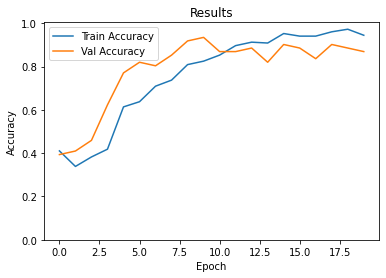

In [87]:
plt.plot(history7.history['accuracy'], label='Train Accuracy')
plt.plot(history7.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

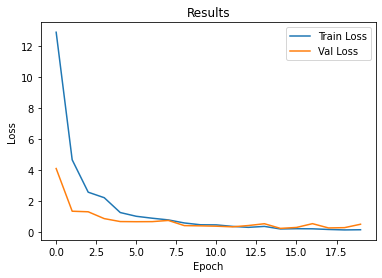

In [88]:
plt.plot(history7.history['loss'], label = 'Train Loss')
plt.plot(history7.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

In [108]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [149]:
test_gen = ImageDataGenerator(rescale = 1/255.)

In [151]:
test_data = test_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/')

Found 159 images belonging to 3 classes.


In [158]:
preds = model7.predict(test_data) >.5

In [163]:
preds.astype(int)

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0,

In [165]:
test_data_values = test_data.labels 

In [166]:
test_data_values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int32)

In [167]:
x_test_binarized = to_categorical(test_data_values)

In [146]:
path = "/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/tube_test/AM85R.jpg"

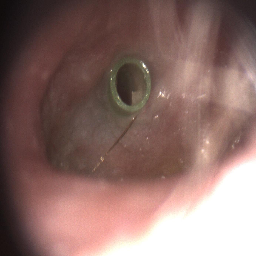

In [147]:
test = image.load_img(path, target_size=(256, 256))
test

In [148]:
model7.predict(np.asarray(test).reshape(1, 256, 256, 3))

array([[0., 0., 1.]], dtype=float32)

## Model 8: Adding Prebuilt Networks InceptionV3

In [2]:
train_gen_aug = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   vertical_flip = True,
                                  validation_split=0.2)

In [3]:
train_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'training' )

Found 251 images belonging to 3 classes.


In [4]:
valid_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'validation' )

Found 61 images belonging to 3 classes.


In [5]:
conv_base = InceptionV3(include_top=False, input_shape = (150, 150, 3))

In [6]:
preds = conv_base.predict(train_aug)

In [11]:
preds_val = conv_base.predict(valid_aug)

In [67]:
model8 = Sequential()
model8.add(GlobalAveragePooling2D())
model8.add(Dense(100, activation = 'relu'))
model8.add(Dropout(0.1))
model8.add(Dense(50, activation = 'relu'))
model8.add(Dense(3, activation = 'softmax'))

model8.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [68]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [70]:
history8 = model8.fit(preds, y_train_binarized, epochs = 30, validation_data = (preds_val, y_valid_binarized),
    batch_size = 100, callbacks=[early_stop])

Epoch 1/30
3/3 [==============================] - 1s 84ms/step - loss: 1.2984 - accuracy: 0.3307 - val_loss: 1.1205 - val_accuracy: 0.3934
Epoch 2/30
3/3 [==============================] - 0s 25ms/step - loss: 1.0805 - accuracy: 0.4303 - val_loss: 1.0684 - val_accuracy: 0.3934
Epoch 3/30
3/3 [==============================] - 0s 29ms/step - loss: 1.0658 - accuracy: 0.4343 - val_loss: 1.0606 - val_accuracy: 0.4262
Epoch 4/30
3/3 [==============================] - 0s 30ms/step - loss: 1.0219 - accuracy: 0.4422 - val_loss: 1.0699 - val_accuracy: 0.4098
Epoch 5/30
3/3 [==============================] - 0s 26ms/step - loss: 0.9744 - accuracy: 0.4781 - val_loss: 1.0841 - val_accuracy: 0.3607
Epoch 6/30
3/3 [==============================] - 0s 28ms/step - loss: 0.9706 - accuracy: 0.5618 - val_loss: 1.0868 - val_accuracy: 0.3770
Epoch 7/30
3/3 [==============================] - 0s 28ms/step - loss: 0.9215 - accuracy: 0.6096 - val_loss: 1.0757 - val_accuracy: 0.3934
Epoch 8/30
3/3 [===========

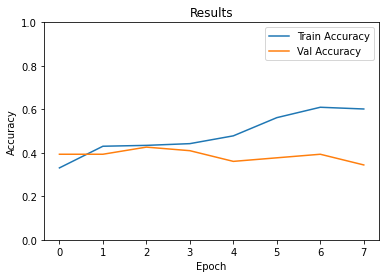

In [71]:
plt.plot(history8.history['accuracy'], label='Train Accuracy')
plt.plot(history8.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

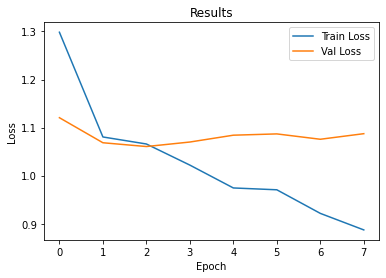

In [72]:
plt.plot(history8.history['loss'], label = 'Train Loss')
plt.plot(history8.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 9: Adding Prebuilt Networks Xception

In [73]:
conv_base9 = Xception(include_top=False, input_shape = (150, 150, 3))

83689472/83683744 [==============================] - 9s 0us/step


In [74]:
preds9 = conv_base9.predict(train_aug)

In [75]:
preds_val9 = conv_base9.predict(valid_aug)

In [76]:
model9 = Sequential()
model9.add(GlobalAveragePooling2D())
model9.add(Dense(100, activation = 'relu'))
model9.add(Dropout(0.1))
model9.add(Dense(50, activation = 'relu'))
model9.add(Dense(3, activation = 'softmax'))

model9.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [77]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [78]:
history9 = model9.fit(preds9, y_train_binarized, epochs = 30, validation_data = (preds_val9, y_valid_binarized),
    batch_size = 100, callbacks=[early_stop])

Epoch 1/30
3/3 [==============================] - 1s 228ms/step - loss: 1.1110 - accuracy: 0.3586 - val_loss: 1.0941 - val_accuracy: 0.4098
Epoch 2/30
3/3 [==============================] - 0s 74ms/step - loss: 0.9954 - accuracy: 0.5139 - val_loss: 1.1040 - val_accuracy: 0.2951
Epoch 3/30
3/3 [==============================] - 0s 57ms/step - loss: 0.9337 - accuracy: 0.6175 - val_loss: 1.1112 - val_accuracy: 0.3607
Epoch 4/30
3/3 [==============================] - 0s 84ms/step - loss: 0.8750 - accuracy: 0.6375 - val_loss: 1.1173 - val_accuracy: 0.3279
Epoch 5/30
3/3 [==============================] - 0s 40ms/step - loss: 0.8089 - accuracy: 0.7012 - val_loss: 1.1336 - val_accuracy: 0.3934
Epoch 6/30
3/3 [==============================] - 0s 40ms/step - loss: 0.7332 - accuracy: 0.7490 - val_loss: 1.1700 - val_accuracy: 0.3443


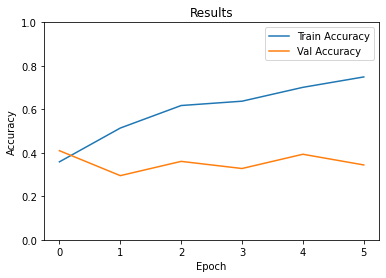

In [79]:
plt.plot(history9.history['accuracy'], label='Train Accuracy')
plt.plot(history9.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

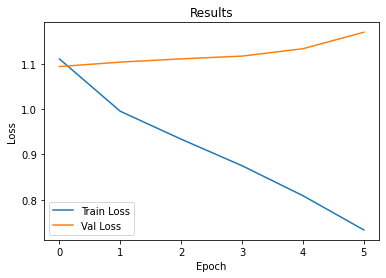

In [80]:
plt.plot(history9.history['loss'], label = 'Train Loss')
plt.plot(history9.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');